In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('sample_data/train.csv')
test=pd.read_csv('sample_data/test.csv')

In [3]:
train.shape,test.shape

((10738, 12), (7160, 11))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [5]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

In [6]:
train['customer_stay_score']=imputer.fit_transform(train[['customer_stay_score']])
train['customer_product_search_score']=imputer.fit_transform(train[['customer_product_search_score']])
train['customer_product_variation_score']=imputer.fit_transform(train[['customer_product_variation_score']])
train['customer_order_score']=imputer.fit_transform(train[['customer_order_score']])

In [7]:
# train['X1']=train['X1'].fillna(train['X1'].mode()[0])
# train['customer_active_segment']=train['customer_active_segment'].fillna(train['customer_active_segment'].mode()[0])

In [8]:
# train['customer_active_segment'].value_counts()

In [9]:
pip install feature_engine

     |████████████████████████████████| 9.5MB 6.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [10]:
# from feature_engine import categorical_encoders as ce
# count_encoder = ce.CountFrequencyCategoricalEncoder(encoding_method='frequency',
#                          variables=['X1','customer_active_segment'])
# count_encoder.fit(train)
# train = count_encoder.transform(train)

In [11]:
train.head(10)

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0
5,csid_6,9.007922,7.051568,0.161564,0.040997,0.191935,4.209840,3.181961,18.862680,C,BA,0
6,csid_7,13.707109,5.625179,0.009634,-0.019998,0.177622,4.165093,4.689834,109.203352,B,E,0
7,csid_8,32.042122,3.563568,-0.050730,0.374230,0.257060,4.366761,4.041260,24.036321,AA,A,0
8,csid_9,20.434181,5.111682,0.133922,0.036893,0.442314,4.759516,3.407424,17.078123,C,BA,0
9,csid_10,13.778214,3.829299,0.159102,0.165818,0.558187,6.255980,3.315462,9.443864,B,BA,0


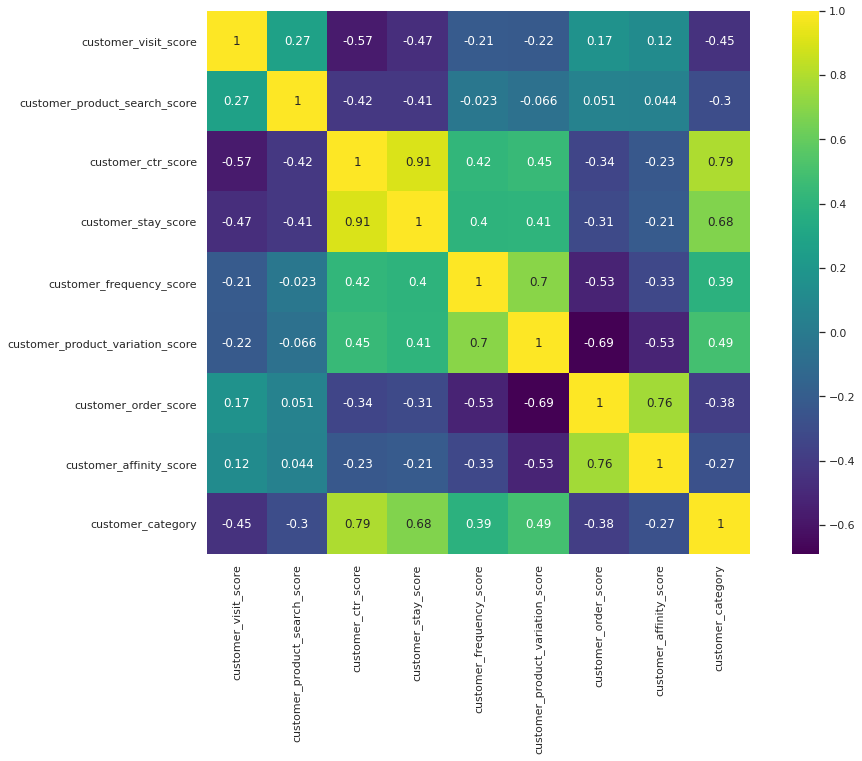

In [12]:
#Correlation
corr = train.corr(method='pearson')
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr, square=True, annot=True, cmap='viridis')

In [13]:
train.corr().sort_values(by=['customer_category'],ascending=False)['customer_category']

customer_category                   1.000000
customer_ctr_score                  0.794445
customer_stay_score                 0.678073
customer_product_variation_score    0.492824
customer_frequency_score            0.389465
customer_affinity_score            -0.274105
customer_product_search_score      -0.300481
customer_order_score               -0.384345
customer_visit_score               -0.449654
Name: customer_category, dtype: float64

In [14]:
y_train=train['customer_category'] 

In [15]:
x_train = train.drop(['customer_id','customer_category','X1','customer_active_segment','customer_order_score','customer_product_search_score','customer_visit_score'],axis=1)

In [16]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import tree
# from sklearn.model_selection import StratifiedKFold
# model = tree.DecisionTreeClassifier(random_state=42)
# params = {'criterion':['entropy','gini'],
#           'max_depth':[2,3,5,10,50],
#           'min_samples_split':[2,3,50,100],
#           'min_samples_leaf':[1,5,8,10]}
# grid =  GridSearchCV(model,params,scoring='precision_macro',cv=StratifiedKFold(5),verbose=2,n_jobs=-1)
# grid.fit(x_train,y_train)
# print(grid.best_score_*-1,grid.best_params_,sep='\n')

In [17]:
# from sklearn import tree
# classifier = tree.DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth= 3,min_samples_leaf= 1, min_samples_split= 2)
# classifier.fit(x_train,y_train)

In [18]:
#Import svm model
from sklearn import svm
from sklearn.svm import SVC
#Create a svm Classifier
classifier = svm.SVC(random_state=42)
#Train the model using the training sets
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
test['customer_stay_score']=imputer.fit_transform(test[['customer_stay_score']])
test['customer_product_search_score']=imputer.fit_transform(test[['customer_product_search_score']])
test['customer_product_variation_score']=imputer.fit_transform(test[['customer_product_variation_score']])
test['customer_order_score']=imputer.fit_transform(test[['customer_order_score']])

In [20]:
# test['X1']=test['X1'].fillna(test['X1'].mode()[0])
# test['customer_active_segment']=test['customer_active_segment'].fillna(test['customer_active_segment'].mode()[0])

In [21]:
# count_encoder = ce.CountFrequencyCategoricalEncoder(encoding_method='frequency',
#                          variables=['X1','customer_active_segment'])
# count_encoder.fit(test)
# test = count_encoder.transform(test)

In [22]:
x_test = test.drop(['customer_id','X1','customer_active_segment','customer_order_score','customer_product_search_score','customer_visit_score'],axis=1)

In [23]:
y_pred_test = classifier.predict(x_test)

In [24]:
result = pd.DataFrame({"customer_id":test['customer_id'],"customer_category":y_pred_test})

In [25]:
result[result['customer_category']==1]

,customer_id,customer_category
84,csid_10823,1
93,csid_10832,1
121,csid_10860,1
123,csid_10862,1
129,csid_10868,1
...,...,...
6718,csid_17457,1
6721,csid_17460,1
6791,csid_17530,1
6820,csid_17559,1


In [26]:
result.to_csv('svm_features.csv',index=False)